# web scrapping using beautiful soup
- xx

In [1]:
import requests

In [2]:
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

In [3]:
r = requests.get(url)
html = r.text

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(html, 'html5lib')

In [6]:
soup.title

<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

In [7]:
soup.title.string

'The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville'

In [8]:
#get hyperlinks , select first 8
soup.findAll('a')[:8]

[<a href="https://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>]

In [9]:
# text from soup
text = soup.get_text()
text[0:100]

'\n\n\nThe Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville\n\n\n\n    body {margin-le'

## Tokenisation

In [10]:
import re

In [11]:
sentence = 'Dhiraj  Dheeraj Upadhyaya Dhiiraj went ; for Data Science Course'
ps = 'Dhi\w+'   #regex

In [12]:
re.findall(ps, sentence)

['Dhiraj', 'Dhiiraj']

In [13]:
re.findall('\w+', sentence)  #all words

['Dhiraj',
 'Dheeraj',
 'Upadhyaya',
 'Dhiiraj',
 'went',
 'for',
 'Data',
 'Science',
 'Course']

In [14]:
tokens = re.findall('\w+', text)  #full text
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']

In [15]:
#!pip install nltk

In [16]:
#another lib
from nltk.tokenize import RegexpTokenizer

In [41]:
tokenizer = RegexpTokenizer('\w+')

In [42]:
tokens2 = tokenizer.tokenize(text)
tokens2[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']

## words sort

In [43]:
words = []

In [46]:
#lower case
for word in tokens:
    words.append(word.lower())

In [47]:
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or']

## stop words

In [48]:
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/du/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
sw = nltk.corpus.stopwords.words('english')
sw[:5]   #remove these from collection of words

['i', 'me', 'my', 'myself', 'we']

In [53]:
words_ns = [] #new list without sw

In [54]:
for word in words:
    if word not in sw:
        words_ns.append(word)

In [59]:
words_ns[:8]

['project',
 'gutenberg',
 'ebook',
 'moby',
 'dick',
 'whale',
 'herman',
 'melville']

## most frequent words


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [64]:
freqdist1 = nltk.FreqDist(words_ns)
freqdist1

FreqDist({'whale': 2488, 'one': 1850, 'like': 1294, 'upon': 1136, 'man': 1054, 'ship': 1038, 'ahab': 1034, 'ye': 946, 'sea': 910, 'old': 904, ...})

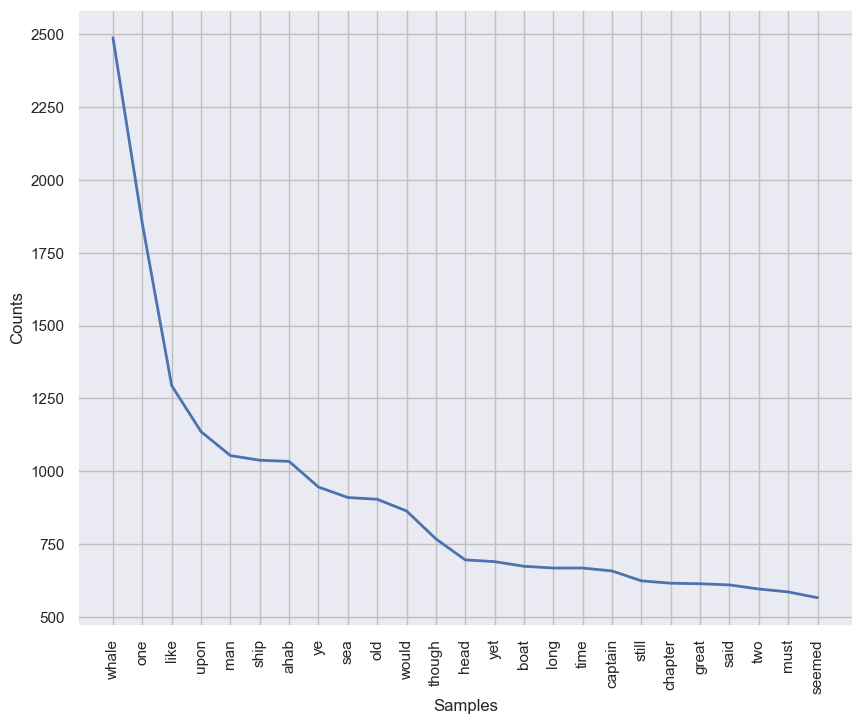

In [66]:
plt.figure(figsize=(10,8))
freqdist1.plot(25)
plt.show()

In [67]:
## Make a full function and call to make plot

In [72]:
def plot_word_freq(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, "html5lib")
    text = soup.get_text()
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    words = []
    for word in tokens:
        words.append(word.lower())
    sw = nltk.corpus.stopwords.words('english')
    words_ns = []
    for word in words:
        if word not in sw:
            words_ns.append(word)
    freqdist1 = nltk.FreqDist(words_ns)
    plt.figure(figsize=(10,8))
    freqdist1.plot(25)
    plt.show();

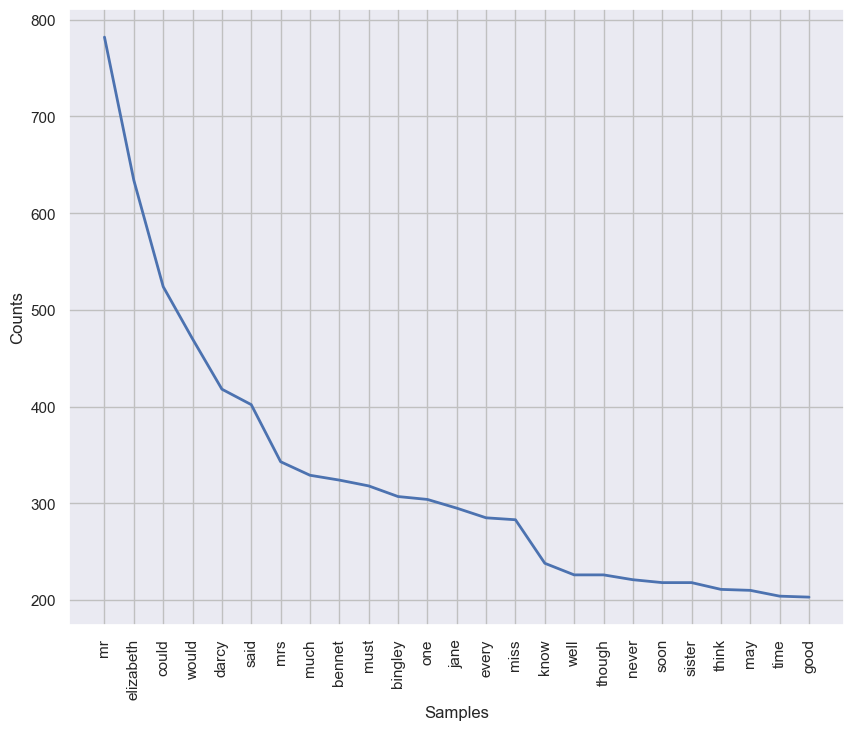

In [73]:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

In [74]:
url2 ='https://www.tutorialspoint.com/how-to-annotate-a-heatmap-with-text-in-matplotlib'

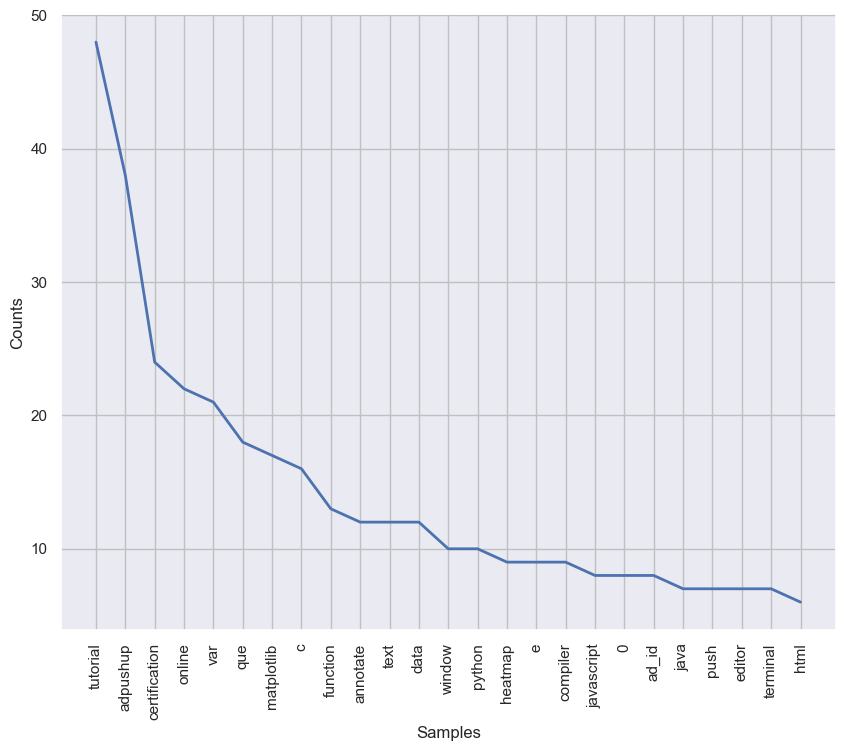

In [75]:
plot_word_freq(url2)